In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost



In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

from google.colab import drive
drive.mount('/content/drive')

# Load the Dataset
# Use the direct file path within your mounted Google Drive
# Make sure to update the path if your file is in a different location
file_path = '/content/drive/MyDrive/Colab Notebooks/creditcard.csv'
data = pd.read_csv(file_path)

# Display Dataset Information
print(data.head())
print(data.info())
print(data.describe())
# Check for Missing Values
print(data.isnull().sum())

# Check for Class Imbalance
print(data['Class'].value_counts())  # Assuming 'Class' is the target column

# Plot the Class Distribution
sns.countplot(data['Class'])
plt.title('Class Distribution')
plt.show()
# Separate Features and Target Variable
X = data.drop(columns=['Class'])  # Drop the target column
y = data['Class']




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


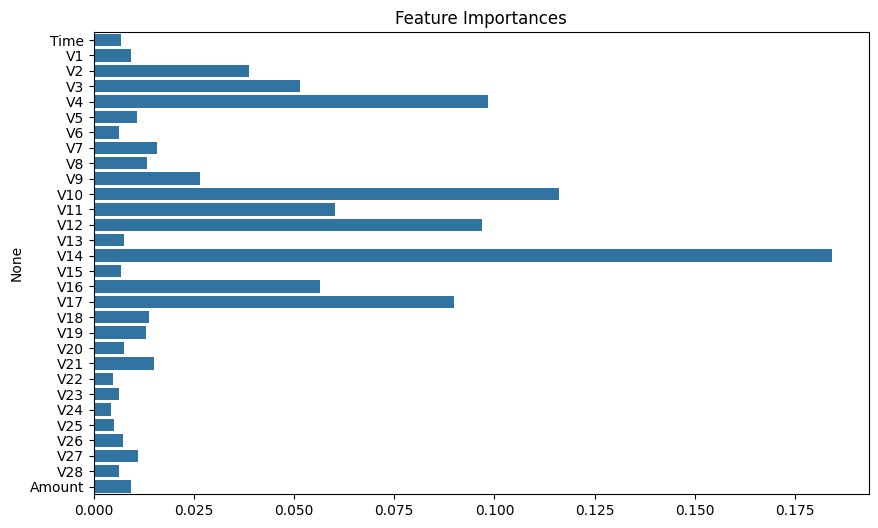

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/creditcard.csv'
data = pd.read_csv(file_path)

# Separate Features and Target Variable
X = data.drop(columns=['Class'])  # Drop the target column
y = data['Class']

# Normalize Data (if required)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Handle Class Imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature Importance
importances = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=data.drop(columns=['Class']).columns)
plt.title('Feature Importances')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC AUC Score: 0.999998993779899


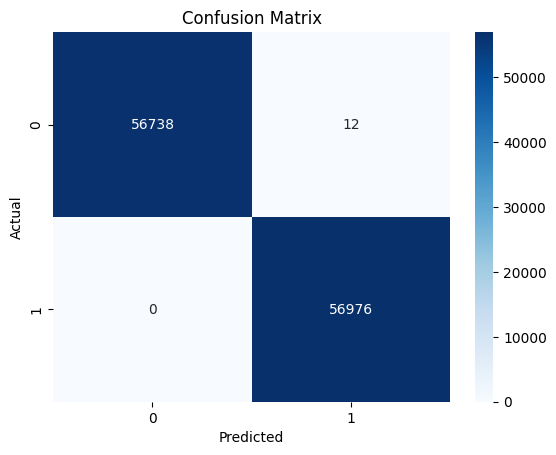

In [ ]:
# Make Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# Evaluation Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

from sklearn.model_selection import GridSearchCV

# Define Parameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate Tuned Model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
print("Tuned Classification Report:\n", classification_report(y_test, y_pred_tuned))

